# Linear Regression Optimizer

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import util.methods as m
import util.statistics as s
import scipy.optimize as spo
# Notebook setting plot size
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

Populating the interactive namespace from numpy and matplotlib


In [3]:
def f(X):
    Y = (X - 1.5)**2 + 0.5
    print("X = {}, Y = {}".format(X, Y))
    return Y

In [5]:
    Xguess = 2.0
min_result = spo.minimize(f, Xguess, method='SLSQP', options={'disp': True})
print("Minimum found at")
print("X = {}, Y = {}".format(min_result.x, min_result.fun))

X = [ 2.], Y = [ 0.75]
X = [ 2.], Y = [ 0.75]
X = [ 2.00000001], Y = [ 0.75000001]
X = [ 0.99999999], Y = [ 0.75000001]
X = [ 1.5], Y = [ 0.5]
X = [ 1.5], Y = [ 0.5]
X = [ 1.50000001], Y = [ 0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Minimum found at
X = [ 1.5], Y = 0.5


# Linear Model Optimizer

In [18]:
def error(line, data):
    """Returns error as a single real value
    error = (y - (mx+ b)) ^2 (The Y-squared difference from the line)
    y = data[:, 1]
    x = data[:, 0]
    m = line[0]
    b = line[1]
    """
    return np.sum((data[:, 1] - (line[0] * data[:, 0] + line[1]))**2)

In [22]:
def fit_line(data, error_func):
    #initial guess
    l = np.float32([0, np.mean(data[:, 1])]) # slope = 0, intercept = mean(y values)

    #Plot initial guess
    x_ends = np.float32([-5, 8])
    plt.plot(x_ends, l[0] * x_ends + l[1], 'm--', linewidth=2.0, label='Initial guess')

    #Call optimizer
    result = spo.minimize(error_func, l, args=(data,), method='SLSQP', options={'disp': True})
    return result.x

Original line C0 = 4.0, C1 = []
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 108.41924629951468
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5


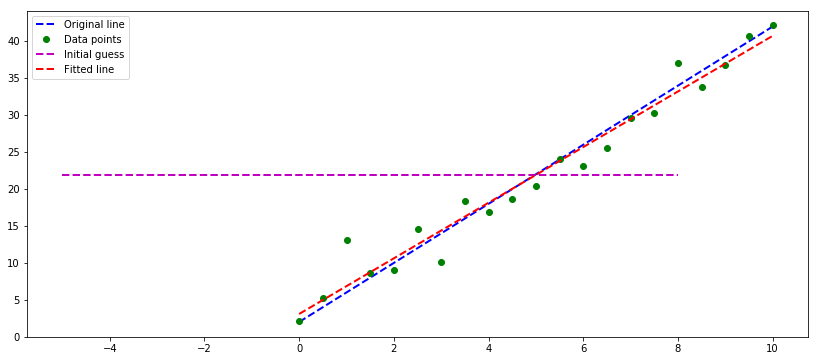

In [25]:
#Define origin line
l_orig = np.float32([4, 2])
print("Original line C0 = {}, C1 = []".format(l_orig[0], l_orig[1]))
Xorig = np.linspace(0, 10, 21)
Yorig = l_orig[0] * Xorig + l_orig[1]
plt.plot(Xorig, Yorig, 'b--', linewidth=2.0, label="Original line")

#Generate noisy data points
noise_sigma = 3.0
noise = np.random.normal(0, noise_sigma, Yorig.shape)
data = np.asarray([Xorig, Yorig + noise]).T
plt.plot(data[:, 0], data[:, 1], 'go', label="Data points")

# Try to fit a line to this data
l_fit = fit_line(data, error)
plt.plot(data[:, 0], l_fit[0] * data[:, 0] + l_fit[1], 'r--', linewidth=2.0, label='Fitted line')
pylab.legend()

# Fitting Polinomial

In [26]:
def error_poly(C, data):
    #Metric: Sum of squared Y-axis difference
    err = np.sum((data[:, 1] - np.polyval(C, data[:, 0])) ** 2)
    return err

def fit_poly(data, error_func, degree=3):
    # all ones
    Cguess = np.poly1d(np.ones(degree + 1, dtype=np.float32))
    
    #plot initial guess
    x = np.linspace(-5, 8, 21)
    plt.plot(x, np.polyval(Cguess, x), 'm--', linewidth=2.0, label='Initial guess')
    
    #call optimizer
    result = spo.minimize(error_func, Cguess, args =(data,), method='SLSQP', options={'disp': True})
    return np.poly1d(result.x)

Original line X^3*1.0 + x^2*2.0 + x*4.0 + 10.0
[  10.      11.407   13.336   15.949   19.408   23.875   29.512   36.481
   44.944   55.063   67.      80.917   96.976  115.339  136.168  159.625
  185.872  215.071  247.384  282.973  322.   ]
[  11.72231224   14.18531604   14.48970649   13.54713874   26.09119279
   20.04137369   34.93822021   31.95773845   41.64702688   52.51011631
   70.89419179   78.98435921   93.17589749  109.26929656  135.92275219
  151.54649893  193.6205448   221.64770241  250.81513972  286.92200934
  318.17604991]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 387.3130359258187
            Iterations: 7
            Function evaluations: 53
            Gradient evaluations: 7
Fited line         3         2
0.9563 x + 2.842 x + 0.3582 x + 13.18


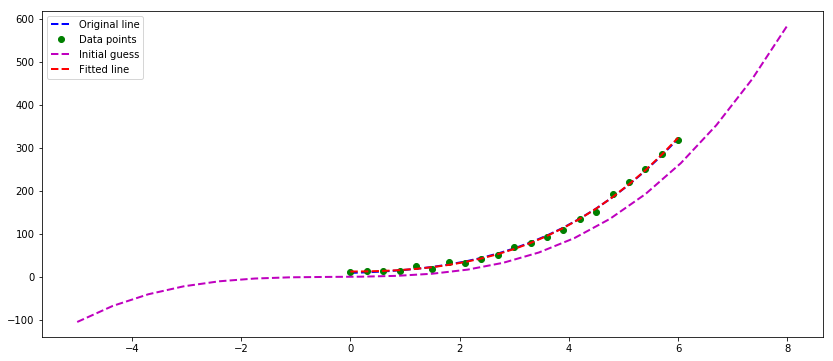

In [47]:
#Define origin line
degree = 3
c_orig = np.float32([1, 2, 4, 10])
print("Original line X^3*{} + x^2*{} + x*{} + {}".format(c_orig[0], c_orig[1], c_orig[2], c_orig[3]))
Xorig = np.linspace(0, 6, 21)
Yorig = np.polyval(c_orig, Xorig)
plt.plot(Xorig, Yorig, 'b--', linewidth=2.0, label="Original line")

#Generate noisy data points
noise_sigma = 5.0
noise = np.random.normal(0, noise_sigma, Xorig.shape)
print(Yorig)
print(Yorig + noise)
data = np.asarray([Xorig, Yorig + noise]).T
plt.plot(data[:, 0], data[:, 1], 'go', label="Data points")

# Try to fit a line to this data
l_fit = fit_poly(data, error_poly)
print("Fited line {}".format(np.poly1d(l_fit)))
plt.plot(data[:, 0], l_fit(data[:, 0]), 'r--', linewidth=2.0, label='Fitted line')
pylab.legend()